In [1]:
#Importing Libraries
import cv2 #imports openCV library for image processing and video analysis
import numpy as np #imports NumPy library for numerical operations with arrays and metrices
import tensorflow as tf #imports TensorFlow library for machine learning and deep learning model development
from tensorflow.keras import layers, models, datasets #imports specific Keras module from TensorFlow
import matplotlib.pyplot as plt # imports Matplotlib's pyplot module for data visualization and plotting
from sklearn.metrics import confusion_matrix #imports confusion_matrix function to evaluate classification performance
import seaborn as sns #imports seaborn library for enhanbced statistical data visualization
from sklearn.model_selection import train_test_split #imports train_test_split function to split datasets into training and testing sets

In [3]:
#Load and preprocess the MNIST dataset
(images, labels), (_, _) = datasets.mnist.load_data() #gets training images and labels
images = images.reshape((60000, 28, 28, 1)).astype('float32') / 255 #adds channel, convert to float, scale 0-1

# Perform train-test split
train_images, test_images, train_labels, test_labels = train_test_split(
    images, labels, test_size=0.2, random_state=42 #splits the datasets in 80/20 training and testing sets
)

In [5]:
#Create the CNN model with 3 convolutional layers
model = models.Sequential([ #sequential model for linear layer stacking
    layers.Input(shape=(28, 28, 1)), #define input shape: 28*28 pixels, 1 channel
    layers.Conv2D(32, (3, 3), activation='relu'), #first conv layer: 32 filters, 3*3 kermel, RelU activation
    layers.MaxPooling2D((2, 2)), #first pooling: 2*2 window, reduces size
    layers.Conv2D(64, (3, 3), activation='relu'), #second conv layer: 64 filters, 3*3 kernel, ReLU activation
    layers.MaxPooling2D((2, 2)), #second pooling: 2*2 window, reduces size
    layers.Conv2D(128, (3, 3), activation='relu'), #third conv layer: 128 filters, 3*3 kernel, ReLU activation
    layers.Flatten(), #flatten 2D feature maps to 1D vector
    layers.Dense(128, activation='relu'), #dense layer: 128 units, ReLU activation
    layers.Dense(10, activation='softmax') #output layer: 10 classes, softmax for classification
])

In [7]:
#Compile and train the model
model.compile( #configure model for training
        optimizer='adam', #adam optimizer for adaptive learning rate
        loss='sparse_categorical_crossentropy', #loss function for integer labels
        metrics=['accuracy']) #track accuracy during training

history = model.fit( #train the model
           train_images, train_labels, #training data and labels  
            epochs=30, #number of training iterations over full dataset
            validation_data=(test_images, test_labels)) #validation data for monitoring

# Save the trained model in Keras format 
model.save('mnist_handwritten_model.keras') #save model architecture and weights

Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.8957 - loss: 0.3279 - val_accuracy: 0.9833 - val_loss: 0.0610
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.9849 - loss: 0.0486 - val_accuracy: 0.9837 - val_loss: 0.0553
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9894 - loss: 0.0311 - val_accuracy: 0.9887 - val_loss: 0.0375
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.9921 - loss: 0.0223 - val_accuracy: 0.9897 - val_loss: 0.0344
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9947 - loss: 0.0174 - val_accuracy: 0.9892 - val_loss: 0.0416
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9946 - loss: 0.0164 - val_accuracy: 0.9897 - val_loss: 0.0412
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9967 - loss: 0.0103 - val_accuracy: 0.9868 - val_loss: 0.0576
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9964 - l

In [8]:
model.summary() #prints a table showing model architecture,layer types,output shapes, parameter counts

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 724,640 (2.76 MB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 483,094 (1.84 MB)

In [14]:
#Load the saved model
loaded_model = tf.keras.models.load_model('mnist_handwritten_model.keras') #loads the pre-trained model from file

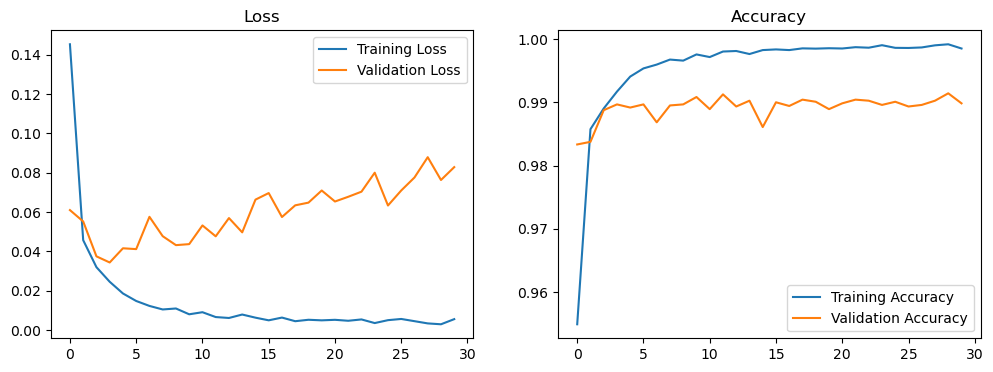

375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


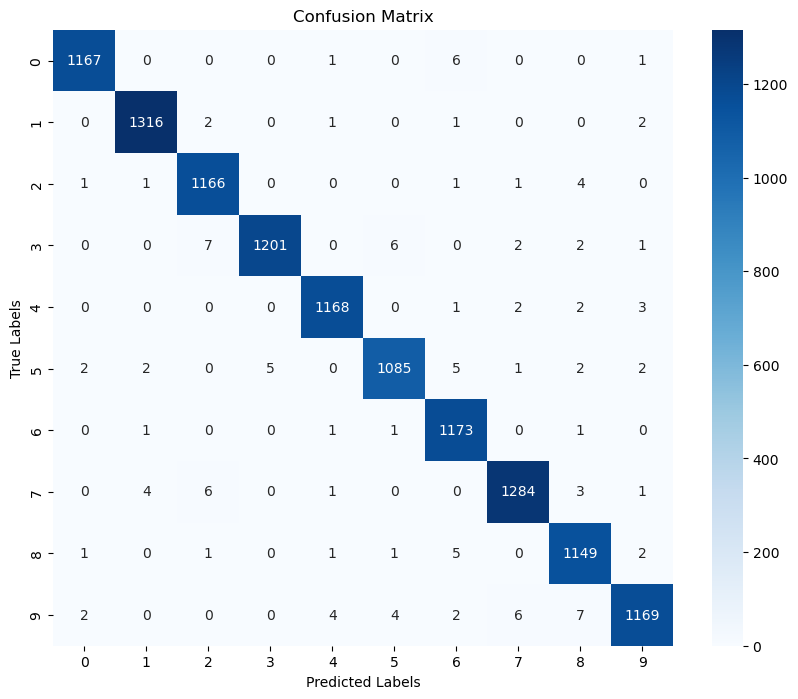

In [22]:
#Plotting loss and accuracy graphs
plt.figure(figsize=(12, 4)) #create figure with 12x4 size
plt.subplot(1, 2, 1) #first subplot (1 row, 2 cols, position 1)
plt.plot(history.history['loss'], label='Training Loss') #plot training loss per epoch
plt.plot(history.history['val_loss'], label='Validation Loss') #plot validation loss per epoch
plt.legend() #add legend for labels
plt.title('Loss') #set title for loss plot

plt.subplot(1, 2, 2) #second subplot (1 row, 2 cols, position 2)
plt.plot(history.history['accuracy'], label='Training Accuracy') #plot training accuracy per epoch
plt.plot(history.history['val_accuracy'], label='Validation Accuracy') #plot validation accuracy per epoch
plt.legend() #add legend for labels
plt.title('Accuracy') #set title for accuracy plot
plt.show() #display the plots

# Confusion Matrix
predictions = loaded_model.predict(test_images) #get model predictions for test images
predicted_labels = np.argmax(predictions, axis=1) #convert probabilities to class labels
cm = confusion_matrix(test_labels, predicted_labels) #compute confusion matrix

plt.figure(figsize=(10, 8)) #create figure with 10x8 size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues') #plot heatmap with counts, blue color scheme
plt.xlabel('Predicted Labels') #label x-axis
plt.ylabel('True Labels') #label y-axis
plt.title('Confusion Matrix') #set title
plt.show() #display the confusion matrix

In [24]:
#Preprocesses the ROI for digit recognition
def preprocess_frame(roi): #define function to preprocess region of interest
    gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY) #convert ROI to grayscale
    blurred = cv2.GaussianBlur(gray, (5, 5), 0) #apply 5x5 Gaussian blur to reduce noise
    _, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU) #threshold to binary, inverted, with Otsu's method 
    
    roi = cv2.resize(thresh, (20, 20), interpolation=cv2.INTER_AREA) #resize to 20x20 pixels
    roi = np.pad(roi, ((4, 4), (4, 4)), 'constant', constant_values=0) #pad to 28x28 with zeros
    roi = roi.astype('float32') / 255.0 #convert to float32 and normalize to 0-1
    roi = np.expand_dims(roi, axis=0) #add batch dimension (1, 28, 28)
    roi = np.expand_dims(roi, axis=-1) #add channel dimension (1, 28, 28, 1)
    
    return roi #return preprocessed ROI

In [28]:
cap = cv2.VideoCapture(0) #open webcam (device 0)

while True: #start video capture loop
    ret, frame = cap.read() #read frame; ret is success flag, frame is image
    if not ret: #if frame capture fails
        break #exit loop

    cv2.rectangle(frame, (100, 100), (300, 300), (255, 0, 0), 2) #draw blue rectangle (ROI) at 100-300 coords

    roi = frame[100:300, 100:300] #define region of interest (ROI)

    processed_image = preprocess_frame(roi) #preprocess the image (assuming preprocess_frame is defined)
    
    if processed_image is not None: #if preprocessing succeeded
       
        prediction = loaded_model.predict(processed_image) #get the prediction from the model
        
        confidence = np.max(prediction) #confidence threshold to make sure prediction is reliable

        if confidence > 0.8:  #adjust threshold as needed
            digit = np.argmax(prediction) #get the digit with the highest confidence

            cv2.putText(frame, f"Digit: {digit}", (120, 90), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2) #display the predicted digit on the frame

    cv2.imshow("Handwritten Digit Recognition", frame)  #show the frame with the digit on it

    if cv2.waitKey(1) & 0xFF == ord('q'): #wait 1ms, check for 'q' key press
        break #exit loop if 'q' pressed

cap.release() #release webcam
cv2.destroyAllWindows() #close all OpenCV windows

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
